# Box Office Prediction

The goal of this project is to predict the international box office revenue of each movie based on different attributes of the given movie.

Data was collected from Kaggle.com TMDB Box Office Prediction Dataset: https://www.kaggle.com/c/tmdb-box-office-prediction/data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)

%matplotlib inline

import ast
from collections import Counter

In [4]:
data = pd.read_csv('train.csv', parse_dates=['release_date'])
test = pd.read_csv('test.csv', parse_dates=['release_date'])

In [5]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2007-07-14,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2058-05-19,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1997-05-23,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2010-09-04,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2005-02-11,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [7]:
data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3000 non-null   int64         
 1   belongs_to_collection  604 non-null    object        
 2   budget                 3000 non-null   int64         
 3   genres                 2993 non-null   object        
 4   homepage               946 non-null    object        
 5   imdb_id                3000 non-null   object        
 6   original_language      3000 non-null   object        
 7   original_title         3000 non-null   object        
 8   overview               2992 non-null   object        
 9   popularity             3000 non-null   float64       
 10  poster_path            2999 non-null   object        
 11  production_companies   2844 non-null   object        
 12  production_countries   2945 non-null   object        
 13  rel

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     4398 non-null   int64         
 1   belongs_to_collection  877 non-null    object        
 2   budget                 4398 non-null   int64         
 3   genres                 4382 non-null   object        
 4   homepage               1420 non-null   object        
 5   imdb_id                4398 non-null   object        
 6   original_language      4398 non-null   object        
 7   original_title         4398 non-null   object        
 8   overview               4384 non-null   object        
 9   popularity             4398 non-null   float64       
 10  poster_path            4397 non-null   object        
 11  production_companies   4140 non-null   object        
 12  production_countries   4296 non-null   object        
 13  rel

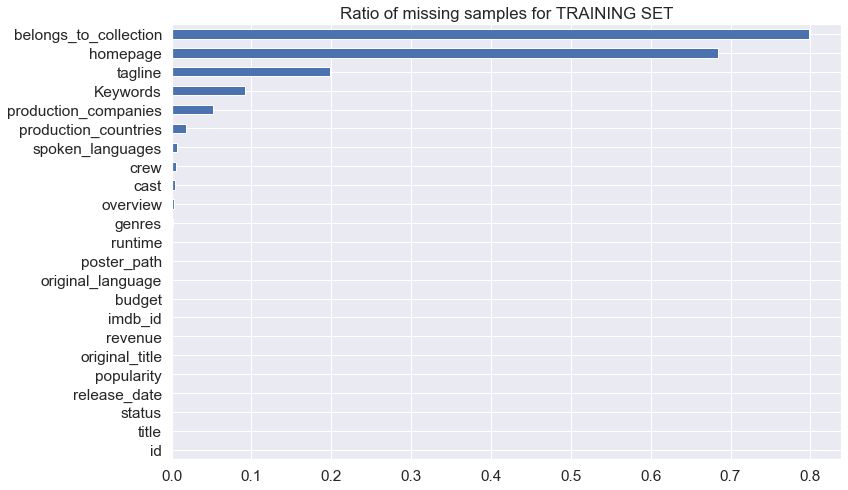

In [10]:
plt.figure(figsize = (12,8))
(data.isnull().sum()/len(data)).sort_values(ascending=True).plot(kind='barh')
plt.title('Ratio of missing samples for TRAINING SET')
plt.show()

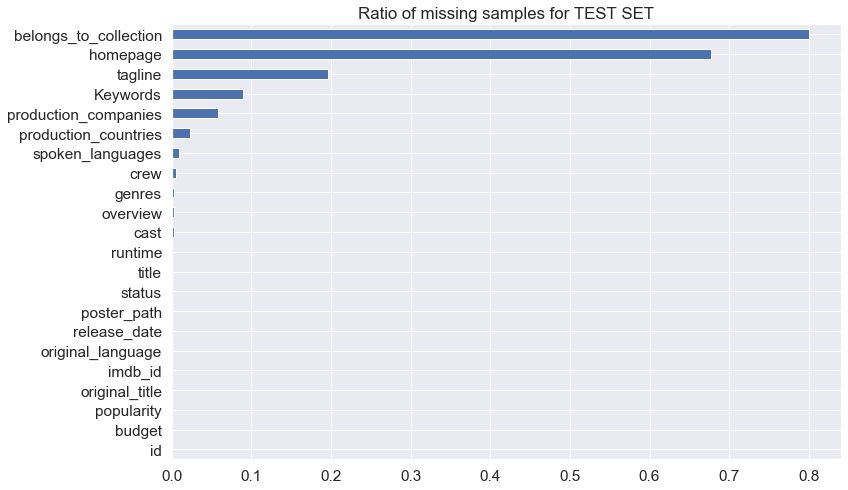

In [11]:
plt.figure(figsize=(12,8))
(test.isnull().sum()/len(test)).sort_values(ascending=True).plot(kind='barh')
plt.title('Ratio of missing samples for TEST SET')
plt.show()

Both datasets appear to have the same characteristics and ratio missing data

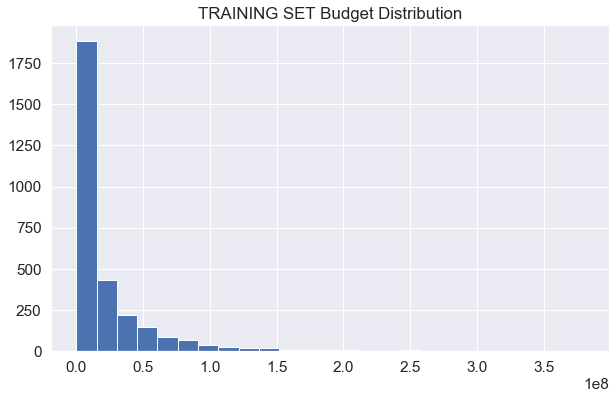

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['budget'], bins=25)
plt.title('TRAINING SET Budget Distribution')
plt.show()

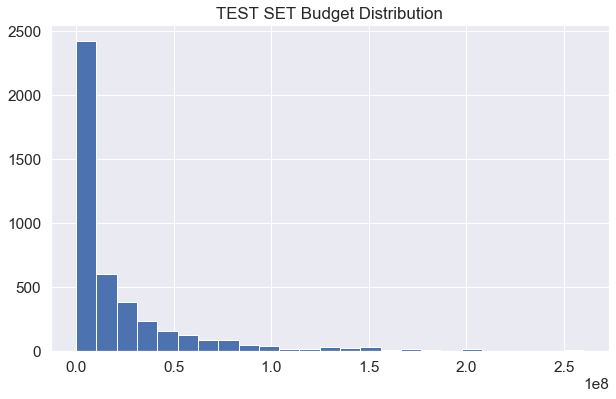

In [13]:
plt.figure(figsize=(10,6))
plt.hist(test['budget'], bins=25)
plt.title('TEST SET Budget Distribution')
plt.show()

In [14]:
data.sort_values(by='budget').head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
895,896,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 12, 'n...",NaN,tt0077629,en,Gray Lady Down,"The USS Neptune, a nuclear submarine, is sunk ...",3.507084,...,1978-03-10,111.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Trapped underwater... with time running out.,Gray Lady Down,"[{'id': 339, 'name': 'submarine'}, {'id': 793,...","[{'cast_id': 1, 'character': 'Captain Paul Bla...","[{'credit_id': '564e776d9251414af70014c5', 'de...",5438927
594,595,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0114694,en,Tommy Boy,Party animal Tommy Callahan is a few cans shor...,11.971318,...,1995-03-31,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"If at first you don't succeed, lower your stan...",Tommy Boy,NaN,"[{'cast_id': 1, 'character': ""Thomas 'Tommy' C...","[{'credit_id': '52fe44359251416c7502c87d', 'de...",32648673
595,596,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt2311182,fr,Un Prince (presque) charmant,A romantic comedy about Jean-Marc who is a con...,1.985348,...,2013-01-07,88.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,A Prince (almost) Charming,NaN,"[{'cast_id': 2, 'character': 'Jean-Marc', 'cre...","[{'credit_id': '52fe4b8d9251416c910de2f1', 'de...",214000
1252,1253,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0113870,en,Murder in the First,Inspired by a true story. A petty criminal sen...,9.518564,...,1995-01-20,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The trial that brought down Alcatraz,Murder in the First,"[{'id': 378, 'name': 'prison'}, {'id': 1563, '...","[{'cast_id': 6, 'character': 'James Stamphill'...","[{'credit_id': '52fe44a9c3a36847f80a2cf9', 'de...",17381942
2144,2145,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0113063,en,The Final Cut,Mysterious bomber is planting explosive device...,1.797462,...,1996-03-01,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Three seconds. Two wires. One out. No mist...,The Final Cut,"[{'id': 572, 'name': 'sex'}, {'id': 772, 'name...","[{'cast_id': 16, 'character': 'John Pierce', '...","[{'credit_id': '52fe4358c3a36847f804d1a5', 'de...",551281


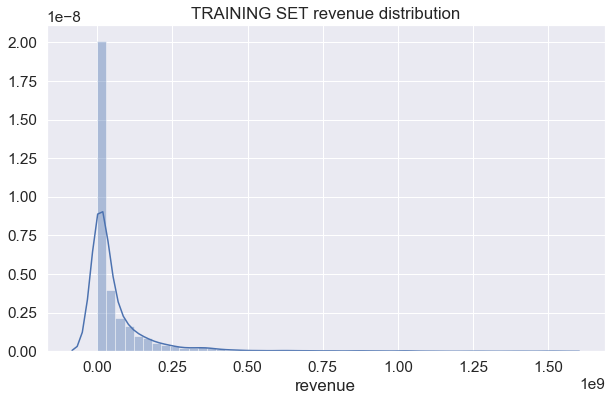

In [15]:
plt.figure(figsize=(10,6))
sns.distplot(data['revenue'])
plt.title('TRAINING SET revenue distribution')
plt.show()

In [16]:
data.sort_values(by='revenue').head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
347,348,NaN,12,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt0118172,en,The Wind in the Willows,"Jailed for his reckless driving, rambunctious ...",1.410322,...,1996-10-16,84.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Go wild in the country!,The Wind in the Willows,NaN,"[{'cast_id': 2, 'character': 'Toad', 'credit_i...","[{'credit_id': '59ce7655c3a3686aca01a522', 'de...",1
1754,1755,NaN,2,"[{'id': 53, 'name': 'Thriller'}, {'id': 10769,...",NaN,tt0110604,en,Mute Witness,"Billy is mute, but it hasn't kept her from bec...",2.466066,...,1995-09-28,95.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...",Released,She Can't Speak. She Can't Scream. She Can't B...,Mute Witness,"[{'id': 3713, 'name': 'chase'}, {'id': 6149, '...","[{'cast_id': 22, 'character': 'Billy Hughes', ...","[{'credit_id': '52fe4775c3a36847f8136af1', 'de...",1
1917,1918,NaN,592,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",NaN,tt0016104,en,The Merry Widow,Prince Danilo falls in love with dancer Sally ...,0.286719,...,2025-08-26,137.0,NaN,Released,NaN,The Merry Widow,"[{'id': 1691, 'name': 'dance'}, {'id': 10181, ...","[{'cast_id': 2, 'character': ""Sally O'Hara"", '...","[{'credit_id': '57351170c3a36802410000d5', 'de...",1
1874,1875,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.vt4.be/vermist,tt1133617,en,Vermist,Five members of the Missing Persons Task Force...,0.229233,...,2007-01-01,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}]",Released,NaN,Missing,NaN,"[{'cast_id': 2, 'character': 'Murat Hoxha', 'c...","[{'credit_id': '52fe4838c3a36847f815cef1', 'de...",1
695,696,NaN,1,"[{'id': 10749, 'name': 'Romance'}, {'id': 53, ...",NaN,tt0374271,hi,Tere Naam,"Lower Caste Radhey Mohan is a no good slacker,...",1.280455,...,2003-08-15,132.0,"[{'iso_639_1': 'hi', 'name': 'हिन्दी'}]",Released,Unfortunately a true love story,Tere Naam,NaN,"[{'cast_id': 3, 'character': 'Radhe Mohan', 'c...","[{'credit_id': '52fe491ec3a36847f8189cfb', 'de...",2


In [17]:
data[data['revenue']<100000]['revenue'].shape

(232,)

In [18]:
data['status'].value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [19]:
test['status'].value_counts()

Released           4389
Post Production       5
Rumored               2
Name: status, dtype: int64

### Dealing With Dates

In [20]:
def change_date(data):
    """
    Creating different date features based on the release_date feature
    """
    data['release_year'] = data['release_date'].dt.year
    data['release_month'] = data['release_date'].dt.month
    data['release_day'] = data['release_date'].dt.day
    data['release_day_of_week'] = data['release_date'].dt.dayofweek
    return data

In [21]:
data = change_date(data)
test = change_date(test)

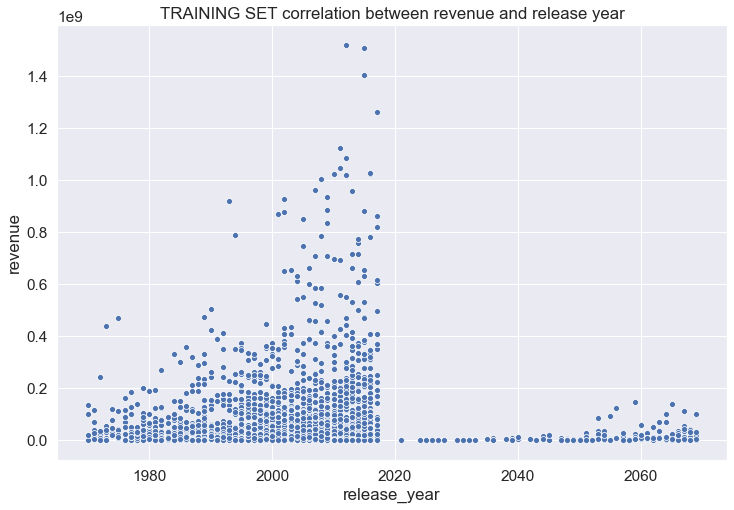

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='release_year', y='revenue', data=data)
plt.title('TRAINING SET correlation between revenue and release year')
plt.show()

In [23]:
data[data['release_year'] > 2019].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_day_of_week
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,...,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873,2065,4,7,1
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,...,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773,2067,6,22,2
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,...,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333,2065,7,1,2
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,...,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000,2056,5,30,1
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,...,NaN,To Kill a Mockingbird,"[{'id': 577, 'name': 'black people'}, {'id': 8...","[{'cast_id': 8, 'character': 'Atticus Finch', ...","[{'credit_id': '52fe4259c3a36847f801770d', 'de...",13129846,2062,12,25,0


After looking up the movies listed in this data frame, it appears the years listed are off by at least 100 years.

In [24]:
data['release_year'] = np.where(data['release_year'] > 2019, data['release_year']-100, data['release_year'])
test['release_year'] = np.where(test['release_year'] > 2019, test['release_year']-100, test['release_year'])

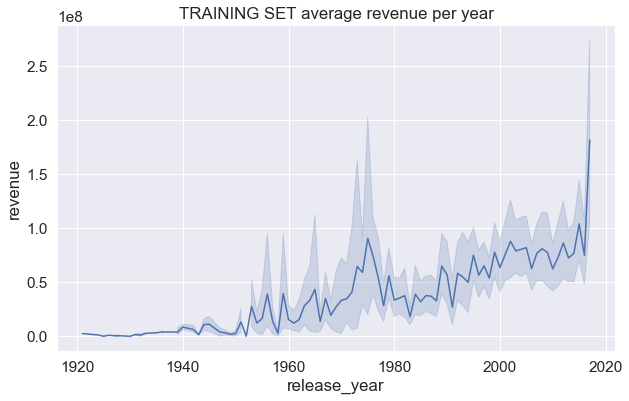

In [25]:
plt.figure(figsize=(10,6))
sns.lineplot(x='release_year', y='revenue', data=data)
plt.title('TRAINING SET average revenue per year')
plt.show()

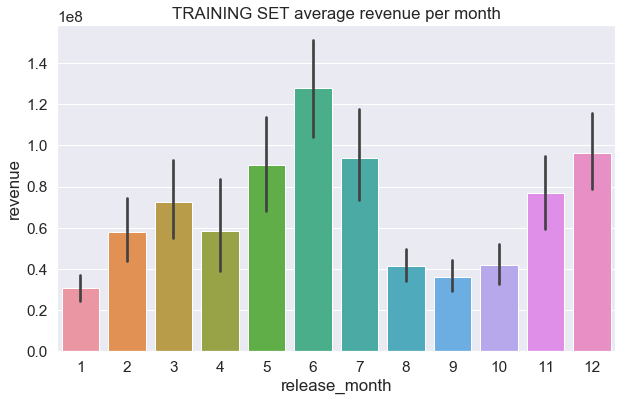

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='release_month', y='revenue', data=data, ci=95)
plt.title('TRAINING SET average revenue per month')
plt.show()

Movies make more revenue during the earlier summer month as well during the christmas holiday season

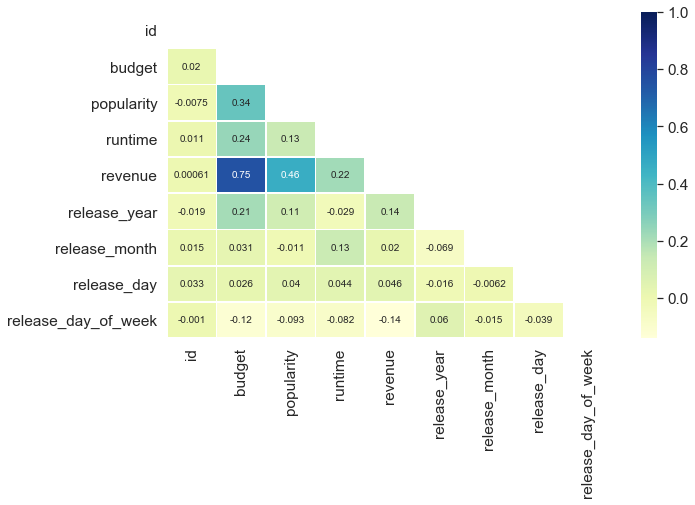

In [27]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(10,6))
    ax = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', mask=mask, lw=.7)

A positive correlation exist between revenue and budget

## Exploring Feature Engineering

In [28]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,release_year,release_month,release_day,release_day_of_week
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,2,20,4
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,8,6,4
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,10,10,4
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,3,9,4
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,2,5,3


**Homepage**

In [29]:
data['has_homepage'] = np.where(data['homepage'].notnull(), 1, 0)

### DEALING WITH JSON COLUMNS

In [30]:
json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries',
                'spoken_languages', 'Keywords', 'cast', 'crew']


for column in json_columns:
    data[column] = data[column].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x) )

In [31]:
def convert_json(df, name):
    df_list = df.apply(lambda x: [i[name] for i in x] if x != {} else [])
    df_all = df.apply(lambda x: ' '.join(sorted([i[name] for i in x])) if x != {} else '')
    df_top = [m[0] for m in Counter([i for j in df_list for i in j]).most_common()]
    return df_list, df_all, df_top

**belongs_to_collection**

In [32]:
data['collection_name'] = data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != [] else 0)
data['contains_collections'] = data['belongs_to_collection'].apply(lambda x: len(x) if x != [] else 0)

In [33]:
data['collection_name'].value_counts(ascending=False)[1:15]

James Bond Collection                     16
Friday the 13th Collection                 7
The Pink Panther (Original) Collection     6
Police Academy Collection                  5
Pokémon Collection                         5
Transformers Collection                    4
Rambo Collection                           4
Resident Evil Collection                   4
Ice Age Collection                         4
Child's Play Collection                    4
Alien Collection                           4
Paranormal Activity Collection             4
The Fast and the Furious Collection        4
Rocky Collection                           4
Name: collection_name, dtype: int64

In [34]:
data['collection_name'].nunique()

423

In [35]:
data['contains_collections'].sum()

604

**genres**

In [36]:
for name in data['genres'][:7]:
    print(name)

[{'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]
[{'id': 16, 'name': 'Animation'}, {'id': 12, 'name': 'Adventure'}, {'id': 10751, 'name': 'Family'}]
[{'id': 27, 'name': 'Horror'}, {'id': 53, 'name': 'Thriller'}]


In [37]:
genre_list, all_genres, top_genres = convert_json(data['genres'], 'name')

In [38]:
len(top_genres)

20

In [39]:
top_genres[:5]

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance']

In [40]:
for name in top_genres:
    data['genre_'+name] = all_genres.apply(lambda x: 1 if name in x else 0)

**production_companies**

In [41]:
data['production_companies']

0       [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1             [{'name': 'Walt Disney Pictures', 'id': 2}]
2       [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                      []
4                                                      []
                              ...                        
2995    [{'name': 'Warner Bros.', 'id': 6194}, {'name'...
2996    [{'name': 'Memfis Film', 'id': 321}, {'name': ...
2997    [{'name': 'New Line Cinema', 'id': 12}, {'name...
2998    [{'name': 'Jersey Films', 'id': 216}, {'name':...
2999    [{'name': 'Lions Gate Films', 'id': 35}, {'nam...
Name: production_companies, Length: 3000, dtype: object

In [42]:
print("Number of production companies involved")
data['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies involved


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

In [43]:
data['production_comp_involved'] = data['production_companies'].apply(lambda x: len(x) if x != {} else 0)

**production_countries**

In [44]:
for name in data['production_countries'][:7]:
    print(name)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'IN', 'name': 'India'}]
[{'iso_3166_1': 'KR', 'name': 'South Korea'}]
[]
[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'CA', 'name': 'Canada'}]


In [45]:
list_countries, all_countries, top_countries = convert_json(data['production_countries'], 'iso_3166_1')

In [46]:
top_countries[:7]

['US', 'GB', 'FR', 'DE', 'CA', 'IN', 'IT']

In [47]:
# Create a category if any part of the movie was produced in the US
for country in top_countries:
    if country == 'US':
        data['production_US'] = all_countries.apply(lambda x: 1 if country in x else 0)

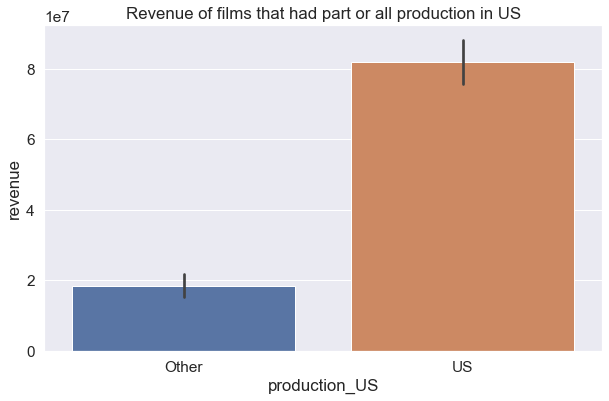

In [48]:
plt.figure(figsize=(10,6))
g=sns.barplot(data['production_US'], data['revenue'])
plt.title("Revenue of films that had part or all production in US")
g.set(xticklabels=['Other','US'])
plt.show()

Movie that had part or all of their production in the US had greater revenue than films produced exclusively outside the US

**spoken_languages**

In [49]:
for i in data['spoken_languages'][0:5]:
    print(i)

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [50]:
list_language, all_languages, top_language = convert_json(data['spoken_languages'], 'iso_639_1')

In [51]:
len(top_language)

79

In [52]:
all_languages

0          en
1          en
2          en
3       en hi
4          ko
        ...  
2995       en
2996       sv
2997       en
2998       en
2999       en
Name: spoken_languages, Length: 3000, dtype: object

In [53]:
for language in top_language:
    if language == 'en':
        data['has_English'] = all_languages.apply(lambda x: 1 if language in x else 0)

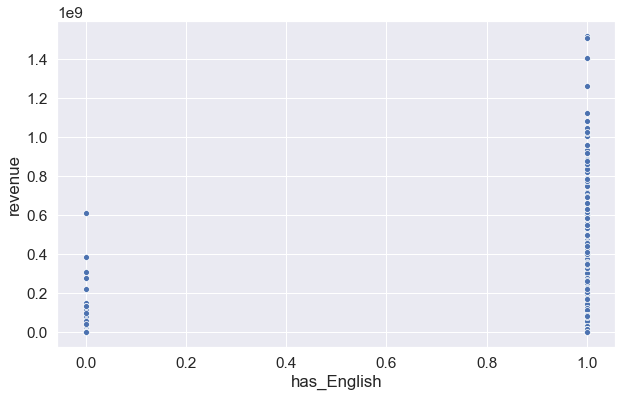

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='has_English', y='revenue', data=data)
plt.show()

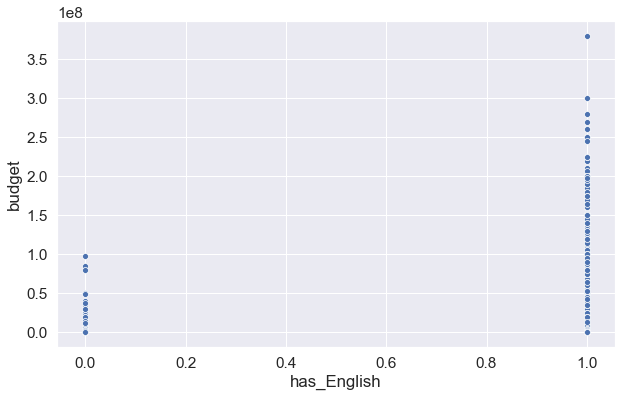

In [55]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='has_English', y='budget', data=data)
plt.show()

Films that had English have greater revenue and budgets based on the given dataset

**Cast and Crew**

In [56]:
for keyword in data['cast'][0]:
    print(keyword)

{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}
{'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}
{'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}
{'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}
{'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}
{'cast_id': 9, 'character': 'Jil

In [57]:
list_cast, all_cast, top_cast = convert_json(data['cast'], 'name')

In [58]:
top_cast[:7]

['Samuel L. Jackson',
 'Robert De Niro',
 'Morgan Freeman',
 'J.K. Simmons',
 'Bruce Willis',
 'Liam Neeson',
 'Susan Sarandon']

In [59]:
for director in data['crew'][:2]:
    print(director)

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

Oof, there's alot of data here so I'll ignore these features for now.

**original_language**

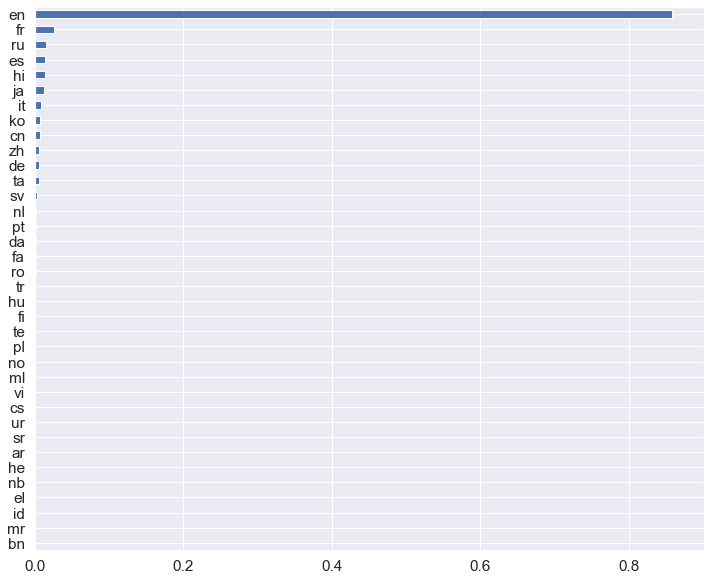

In [60]:
plt.figure(figsize=(12,10))
(data['original_language'].value_counts(ascending=True)/len(data['original_language'])).plot(kind='barh')
plt.show()

In [61]:
data['new_original_language'] = data['original_language'].apply(lambda x: 1 if x == 'en' else 0)

In [62]:
data['new_original_language'].value_counts()

1    2575
0     425
Name: new_original_language, dtype: int64

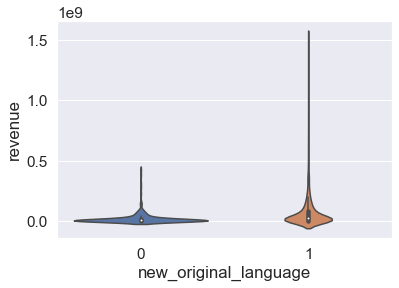

In [63]:
sns.violinplot(x='new_original_language', y='revenue',data=data)

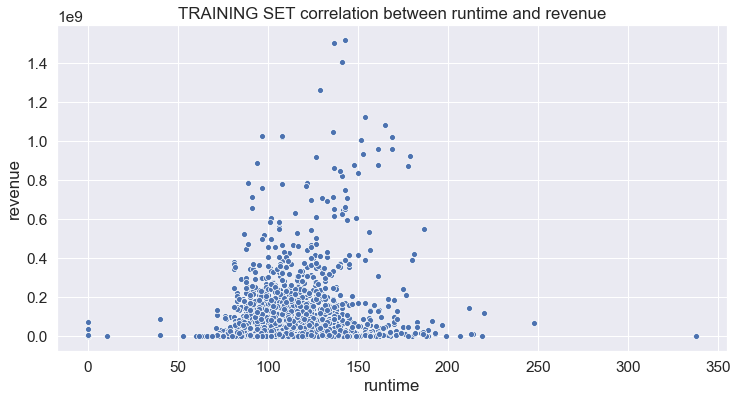

In [64]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='runtime', y='revenue', data=data)
plt.title('TRAINING SET correlation between runtime and revenue')
plt.show()

**Dealing with Population and Revenue**

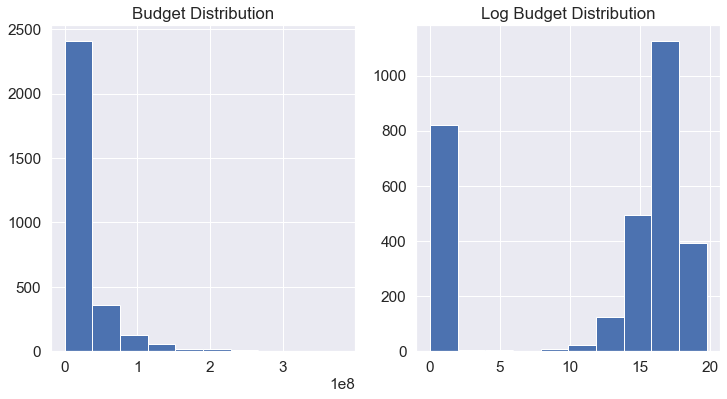

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.hist(data['budget'])
ax2.hist(np.log1p(data['budget']))
ax1.set_title('Budget Distribution')
ax2.set_title('Log Budget Distribution')
plt.show()

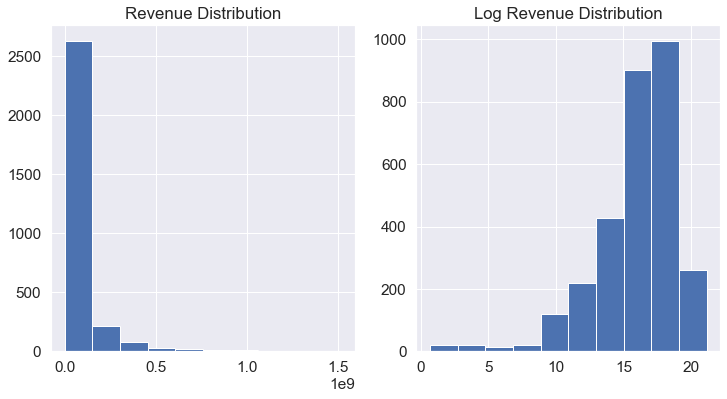

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
ax1.hist(data['revenue'])
ax2.hist(np.log1p(data['revenue']))
ax1.set_title('Revenue Distribution')
ax2.set_title('Log Revenue Distribution')
plt.show()

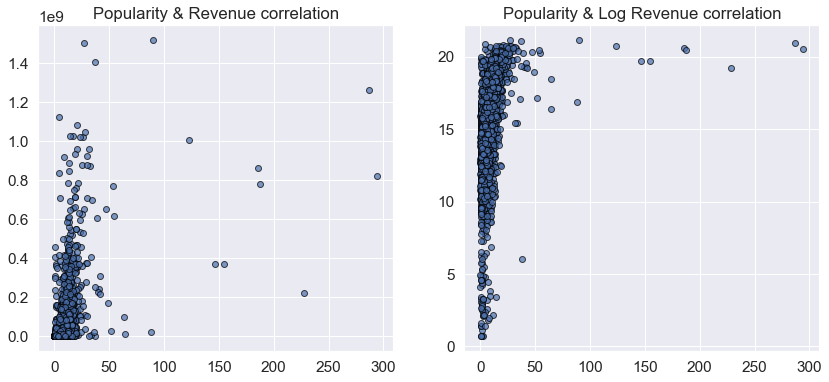

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.scatter(data['popularity'],data['revenue'], alpha=0.7, edgecolors='black')
ax2.scatter(data['popularity'], np.log1p(data['revenue']), alpha=0.7, edgecolors='black')
ax1.set_title('Popularity & Revenue correlation')
ax2.set_title('Popularity & Log Revenue correlation')
plt.show()

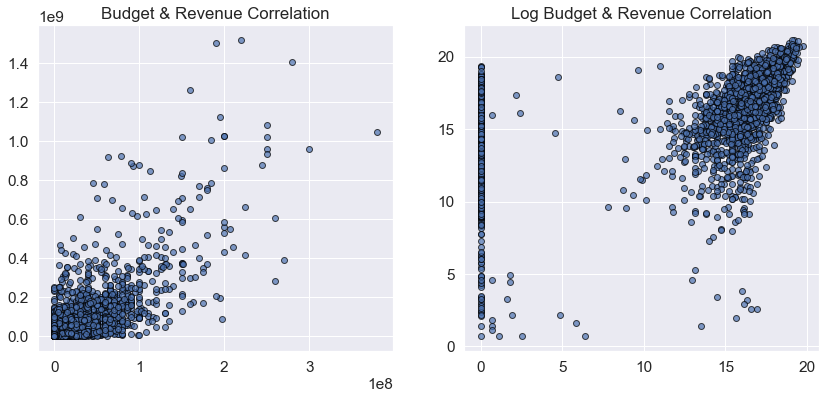

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.scatter(data['budget'],data['revenue'], alpha=0.7, edgecolors='black')
ax2.scatter(np.log1p(data['budget']),np.log1p(data['revenue']), alpha=0.7, edgecolors='black')
ax1.set_title('Budget & Revenue Correlation')
ax2.set_title('Log Budget & Revenue Correlation')
plt.show()

Due to the data distribution in budget and revenue features, these features provide more reliable insights when normalized compared to non-normalized features that cluster around 0

In [69]:
data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,production_comp_involved,production_US,has_English,new_original_language
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,3,1,1,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,0,0,1,1,1,1
2,3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,3,1,1,1
3,4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,0,0,0,0,0,0,0,1,0
4,5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data.describe()

,id,budget,popularity,runtime,revenue,release_year,release_month,release_day,release_day_of_week,has_homepage,...,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,genre_TV Movie,production_comp_involved,production_US,has_English,new_original_language
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07,1999.713000,6.775333,15.046333,3.253667,0.315333,...,0.033333,0.033333,0.029000,0.014333,0.010333,0.000333,2.698333,0.760667,0.872667,0.858333
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08,15.423313,3.409115,8.632981,1.328373,0.464726,...,0.179535,0.179535,0.167834,0.118881,0.101143,0.018257,2.014121,0.426748,0.333402,0.348766
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00,1921.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06,1993.000000,4.000000,8.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07,2004.000000,7.000000,15.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07,2011.000000,10.000000,22.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09,2017.000000,12.000000,31.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000


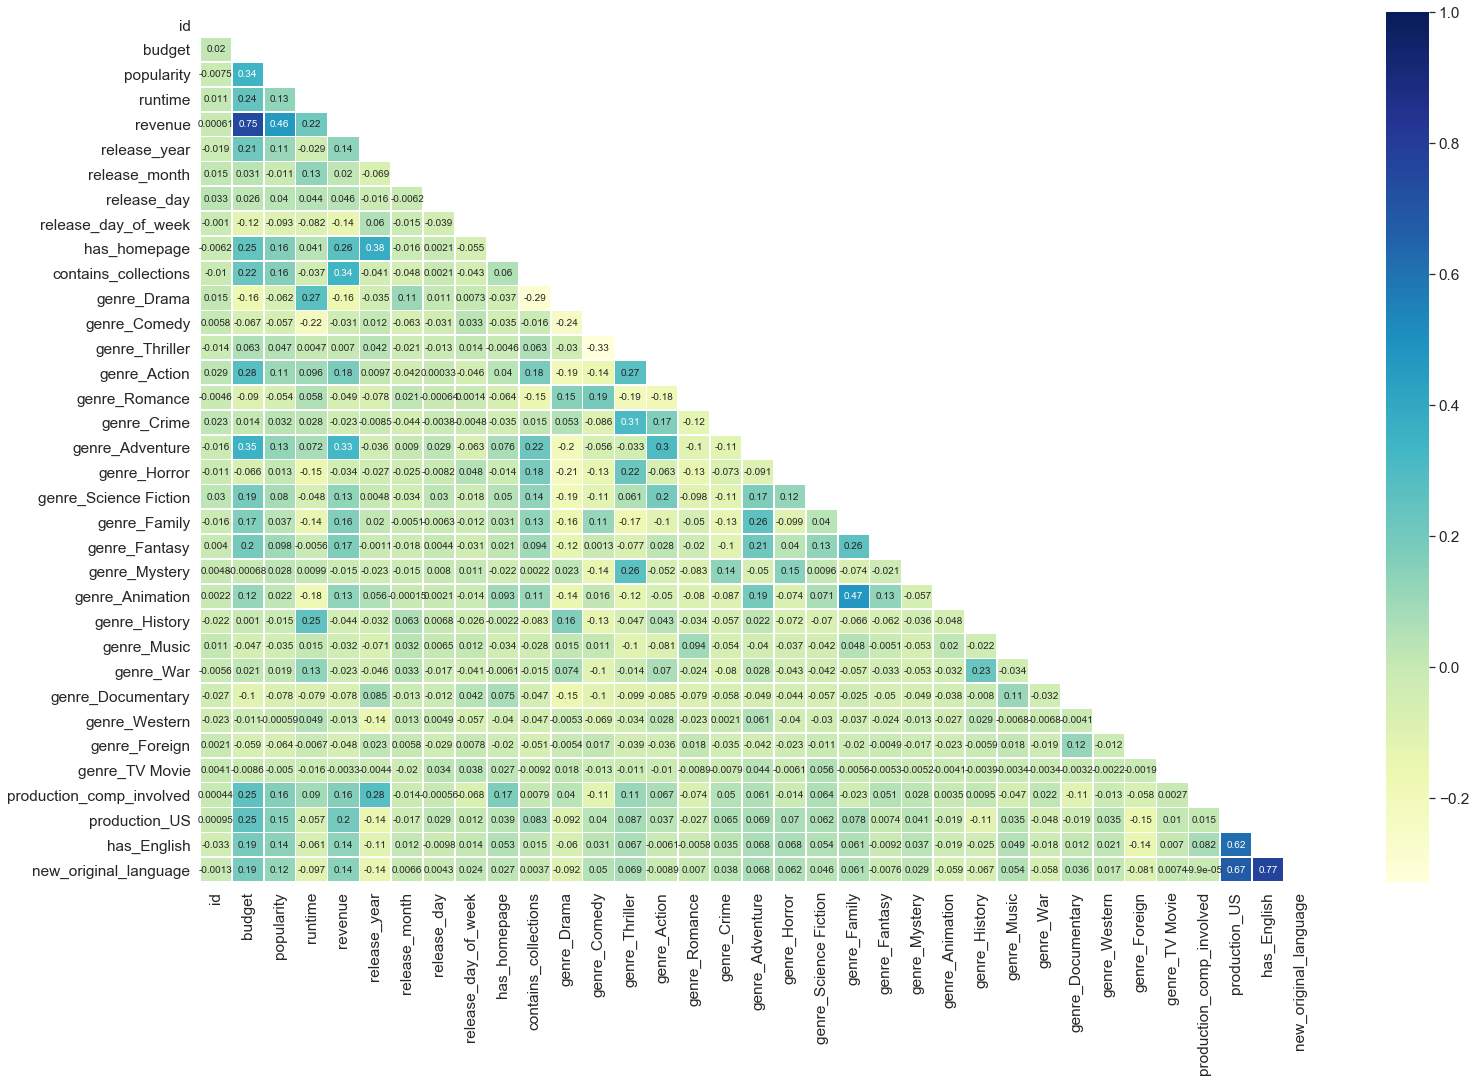

In [74]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(25,16))
    ax = sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', mask=mask, lw=.7)

### Modelling

I think I will reupload all the data and plug it into one big function that will feature engineer everything so I can automatically generate these new features into different datasets.

In [75]:
# I'll just copy and paste everything into this cell to help me keep better track of my work and for reproducibility

def convert_json(df, name):
    df_list = df.apply(lambda x: [i[name] for i in x] if x != {} else [])
    df_all = df.apply(lambda x: ' '.join(sorted([i[name] for i in x])) if x != {} else '')
    df_top = [m[0] for m in Counter([i for j in df_list for i in j]).most_common()]
    return df_list, df_all, df_top


def feature_engineer_datasets(df):

    """
    Creating different date features based on the release_date feature
    """
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_day_of_week'] = df['release_date'].dt.dayofweek
    
    df['release_year'] = np.where(df['release_year'] > 2019, df['release_year']-100, df['release_year'])
    
    # normalize budget
    df['budget'] = np.log1p(df['budget'])
    
    # create homepage feature
    df['has_homepage'] = np.where(df['homepage'].notnull(), 1, 0)
    
    
    """
    Generate a list of different values from the existing json columns
    """
    json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries',
                'spoken_languages', 'Keywords', 'cast', 'crew']


    for column in json_columns:
        df[column] = df[column].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
        
    df['collection_name'] = df['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != [] else 0)
    df['contains_collections'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != [] else 0)
    
    genre_list, all_genres, top_genres = convert_json(df['genres'], 'name')
    for name in top_genres:
        df['genre_'+name] = all_genres.apply(lambda x: 1 if name in x else 0)
        
    df['production_comp_involved'] = df['production_companies'].apply(lambda x: len(x) if x != {} else 0)
    
    list_countries, all_countries, top_countries = convert_json(df['production_countries'], 'iso_3166_1')
    for country in top_countries:
        if country == 'US':
            df['production_US'] = all_countries.apply(lambda x: 1 if country in x else 0)
            
    list_language, all_languages, top_language = convert_json(df['spoken_languages'], 'iso_639_1')
    for language in top_language:
        if language == 'en':
            df['has_English'] = all_languages.apply(lambda x: 1 if language in x else 0)
            
    df['new_original_language'] = df['original_language'].apply(lambda x: 1 if x == 'en' else 0)
    
    """
    Drop the json columns
    """
    df.drop(json_columns+['homepage','id','imdb_id','poster_path','release_date','tagline','overview',
                          'original_title', 'original_language'], 
            axis=1, inplace=True)
    
    return df

In [76]:
train = pd.read_csv('train.csv', parse_dates=['release_date'])
test = pd.read_csv('test.csv', parse_dates=['release_date'])

In [77]:
train = feature_engineer_datasets(train)
test = feature_engineer_datasets(test)

In [78]:
train['revenue'] = np.log1p(train['revenue'])

In [79]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [80]:
minmax=MinMaxScaler()

X = train.drop(['revenue','title','collection_name', 'genre_TV Movie'], axis=1)
y = train['revenue']

test = test.drop(['title','collection_name'], axis=1)

In [95]:
X.describe()

,budget,popularity,runtime,release_year,release_month,release_day,release_day_of_week,has_homepage,contains_collections,genre_Drama,...,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,production_comp_involved,production_US,has_English,new_original_language
count,3000.000000,3000.000000,2998.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,11.878667,8.463274,107.856571,1999.713000,6.775333,15.046333,3.253667,0.315333,0.201333,0.510333,...,0.044000,0.033333,0.033333,0.029000,0.014333,0.010333,2.698333,0.760667,0.872667,0.858333
std,7.441843,12.104000,22.086434,15.423313,3.409115,8.632981,1.328373,0.464726,0.401063,0.499977,...,0.205129,0.179535,0.179535,0.167834,0.118881,0.101143,2.014121,0.426748,0.333402,0.348766
min,0.000000,0.000001,0.000000,1921.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.018053,94.000000,1993.000000,4.000000,8.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,15.894952,7.374861,104.000000,2004.000000,7.000000,15.000000,4.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,17.182806,10.890983,118.000000,2011.000000,10.000000,22.000000,4.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000
max,19.755682,294.337037,338.000000,2017.000000,12.000000,31.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000


In [81]:
num_cols = [
    col_name for col_name in X.columns
    if X[col_name].dtype in ['int64', 'float64']
           ]

cat_cols = [
    col_name for col_name in X.columns
    if X[col_name].dtype == 'object' 
            ]

In [82]:
cat_cols

['status']

In [83]:
# Imputer for missing numerical data
number_imputer = SimpleImputer(strategy='median')

# Pipeline for missing categorical data
cat_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle numerical and categorical data together
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_imputer, cat_cols),
        ('num', number_imputer, num_cols)
])

In [84]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [86]:
# Random Forest Block
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Combining the model and the pipelines together
rfr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rfr)
])

rfr_score = cross_val_score(rfr_model, X, y, cv=10, scoring='neg_mean_squared_log_error').mean()
print(np.sqrt(abs(rfr_score)))

0.2080515792008379


In [87]:
# Gradient Boosting Block
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Combining the model and the pipelines together
gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', gbr)
])

gbr_score = cross_val_score(gbr_model, X, y, cv=10, scoring='neg_mean_squared_log_error').mean()
print(np.sqrt(abs(gbr_score)))

0.20235519665101206


In [88]:
# XGBRegressor Block
xgb = XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')

# Combining the model and the pipelines together
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', xgb)
])

xgb_score = cross_val_score(xgb_model, X, y, cv=10, scoring='neg_mean_squared_log_error').mean()
print(np.sqrt(abs(xgb_score)))

0.20254855389281867


Each of the models present similar scores.  Gradient Boosting and XGBoost present slightly better scores.

For this project I will try to see if I can improve the score of the Gradient Boosting model.

In [89]:
gbr_model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'scaler', 'model', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__cat', 'preprocessor__num', 'preprocessor__cat__memory', 'preprocessor__cat__steps', 'preprocessor__cat__verbose', 'preprocessor__cat__imputer', 'preprocessor__cat__onehot', 'preprocessor__cat__imputer__add_indicator', 'preprocessor__cat__imputer__copy', 'preprocessor__cat__imputer__fill_value', 'preprocessor__cat__imputer__missing_values', 'preprocessor__cat__imputer__strategy', 'preprocessor__cat__imputer__verbose', 'preprocessor__cat__onehot__categories', 'preprocessor__cat__onehot__drop', 'preprocessor__cat__onehot__dtype', 'preprocessor__cat__onehot__handle_unknown', 'preprocessor__cat__onehot__sparse', 'preprocessor__num__add_indicator', 'preprocessor__num__copy', 'preprocessor__num__fill_value', 'preprocessor__num__m

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'model__n_estimators':[50,100,500], 
    'model__learning_rate': [0.1,0.05,0.02],
    'model__max_depth':[None,4,12,25], 
    'model__min_samples_leaf':[1,5,12]
}

In [100]:
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, 
                           cv=10, scoring='neg_mean_squared_log_error',
                          n_jobs=-1)

In [101]:
grid_search.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                   

In [102]:
grid_search.best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 4,
 'model__min_samples_leaf': 12,
 'model__n_estimators': 500}

In [107]:
# Gradient Boosting Block
# Older model: (n_estimators=500, max_depth=4, learning_rate=0.05, min_samples_leaf=12, random_state=42)
# GridSearchCV and tinkering
gbr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('model', GradientBoostingRegressor(n_estimators=600, max_depth=4, learning_rate=0.05, 
                                        min_samples_leaf=12, random_state=42))
])

gbr_score = cross_val_score(gbr_model, X, y, cv=10, scoring='neg_mean_squared_log_error').mean()
print(np.sqrt(abs(gbr_score)))

0.19666197472025215


I was able to slightly improve my score through hyperparameter tuning.

In [108]:
gbr_model.fit(X,y)
y_preds = gbr_model.predict(test)

/Users/kyleortega/opt/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


Ooops I forgot I already dropped the id column

In [109]:
new_test = pd.read_csv('test.csv')

In [110]:
submit = pd.DataFrame({'id': new_test['id'], 'revenue': np.expm1(y_preds)})

In [111]:
submit.to_csv('box-office-revenue-prediction.csv', index=False)

~~~~~~~~~